In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [23]:
#loading data - using only outflow
outflow = pd.read_csv('cleaned_countyoutflow.csv')
#zillow and health data
zh = pd.read_csv('Agony - Health And Zillow Population Fixed.csv')

# Data Cleaning

In [24]:
#converting outflow year column into an actual year (If 16-17, converting to 2017)
outflow.loc[outflow['year'].str.endswith('17'), 'year'] = '2017'
outflow.loc[outflow['year'].str.endswith('18'), 'year'] = '2018'
outflow.loc[outflow['year'].str.endswith('19'), 'year'] = '2019'
outflow.loc[outflow['year'].str.endswith('20'), 'year'] = '2020'
outflow.loc[outflow['year'].str.endswith('21'), 'year'] = '2021'

#converting year to int type and renaming for later merging
outflow['year'] = outflow['year'].astype(int)
outflow = outflow.rename(columns={'year': 'Year', 'y2fips': 'FIPS'})

#check
#outflow.head()
#health.head()

In [25]:
#converting Year to int type
zh['Year'] = zh['Year'].astype(int)

#check
#zillow_melted.head()

In [26]:
#merging with outflow data
data = pd.merge(zh, outflow, on=['Year', 'FIPS'], how='inner')

#check
data.head()

,Year,FIPS,State,County,Fair_Poor_Health_Perc,Phys_Unhealth_Days,Ment_Unhealth_Days,Smoke_Perc,Obese_Perc,Phys_Inac_Perc,...,origin_state_fips,origin_county_fips,destination_state_fips,destination_county_fips,y1fips,y2_state,y2_countyname,num_returns,num_individuals,adjusted_gross_income
0,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,1,1,1,1,1001,AL,Autauga County Non-migrants,17484,39711,1106647
1,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,1,21,1,1,1021,AL,Autauga County,83,220,3006
2,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,1,47,1,1,1047,AL,Autauga County,82,195,2917
3,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,1,51,1,1,1051,AL,Autauga County,535,1155,23666
4,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,1,73,1,1,1073,AL,Autauga County,53,108,2488


In [27]:
#dropping columns that are duplicative
data = data.drop(columns = ['y2_state', 'y2_countyname', 'origin_county_fips', 'destination_county_fips', 'destination_state_fips'])

#check
data.head()

,Year,FIPS,State,County,Fair_Poor_Health_Perc,Phys_Unhealth_Days,Ment_Unhealth_Days,Smoke_Perc,Obese_Perc,Phys_Inac_Perc,...,Some_Association_Rate,Severe_Housing_Perc,Insufficent_Sleep_Perc,Population,Zillow_Value,origin_state_fips,y1fips,num_returns,num_individuals,adjusted_gross_income
0,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,13.72,14.72,37.6,55347,165497.8241,1,1001,17484,39711,1106647
1,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,13.72,14.72,37.6,55347,165497.8241,1,1021,83,220,3006
2,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,13.72,14.72,37.6,55347,165497.8241,1,1047,82,195,2917
3,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,13.72,14.72,37.6,55347,165497.8241,1,1051,535,1155,23666
4,2017,1001,Alabama,Autauga,17.88,4.22,4.18,17.38,34.1,28.6,...,13.72,14.72,37.6,55347,165497.8241,1,1073,53,108,2488


In [28]:
#write data to csv file
data.to_csv('final_dataset.csv', index = False)

# EDA

In [29]:
#dimensions
data.shape

(225820, 23)

In [30]:
#summary stats
data.describe()

,Year,FIPS,Fair_Poor_Health_Perc,Phys_Unhealth_Days,Ment_Unhealth_Days,Smoke_Perc,Obese_Perc,Phys_Inac_Perc,Excess_Drink_Perc,Some_College_Perc_25_44,...,Some_Association_Rate,Severe_Housing_Perc,Insufficent_Sleep_Perc,Population,Zillow_Value,origin_state_fips,y1fips,num_returns,num_individuals,adjusted_gross_income
count,225820.000000,225820.000000,225820.000000,225820.000000,225820.000000,225820.000000,225820.000000,225820.000000,225820.000000,225820.000000,...,225820.000000,225820.000000,225820.000000,2.258200e+05,2.250970e+05,225820.000000,225820.000000,2.258200e+05,2.258200e+05,2.258200e+05
mean,2019.184935,28761.369560,16.669173,3.805003,3.993855,16.495694,29.103579,22.850780,18.596488,64.927184,...,9.793945,17.095101,34.380723,7.153414e+05,2.820482e+05,28.519117,28611.376286,2.198601e+03,4.551382e+03,1.845416e+05
std,1.528154,16131.893964,3.981942,0.610580,0.585273,3.663821,5.369331,5.380911,2.997489,10.431571,...,4.049707,4.919356,3.963328,1.211876e+06,1.838304e+05,15.888240,15916.821700,3.022164e+04,6.196140e+04,2.913386e+06
min,2017.000000,1001.000000,7.880000,2.160000,2.280000,5.910000,11.000000,8.100000,6.450000,1.000000,...,0.000000,0.000000,22.700000,8.600000e+01,2.610488e+04,1.000000,1001.000000,-1.000000e+00,-1.000000e+00,-1.283400e+06
25%,2017.000000,13051.000000,13.690000,3.370000,3.580000,14.000000,25.400000,19.000000,16.710000,58.000000,...,7.180000,13.820000,31.700000,8.180100e+04,1.679799e+05,13.000000,13095.000000,2.700000e+01,5.000000e+01,1.544000e+03
50%,2019.000000,29023.000000,16.220000,3.780000,3.960000,16.070000,29.200000,22.800000,18.530000,66.000000,...,9.210000,16.340000,34.300000,3.183160e+05,2.344163e+05,28.000000,28159.000000,4.400000e+01,8.100000e+01,2.752000e+03
75%,2021.000000,44005.000000,19.140000,4.190000,4.370000,18.860000,32.700000,26.200000,20.340000,72.000000,...,11.670000,19.600000,36.930000,8.409000e+05,3.279047e+05,42.000000,42055.000000,9.900000e+01,1.810000e+02,6.635000e+03
max,2021.000000,56045.000000,42.400000,8.300000,7.290000,44.570000,58.900000,50.400000,31.010000,100.000000,...,70.620000,71.220000,49.060000,1.017029e+07,2.090564e+06,56.000000,56045.000000,3.829564e+06,7.745039e+06,3.474391e+08


In [31]:
#info on data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225820 entries, 0 to 225819
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Year                      225820 non-null  int32  
 1   FIPS                      225820 non-null  int64  
 2   State                     225820 non-null  object 
 3   County                    225820 non-null  object 
 4   Fair_Poor_Health_Perc     225820 non-null  float64
 5   Phys_Unhealth_Days        225820 non-null  float64
 6   Ment_Unhealth_Days        225820 non-null  float64
 7   Smoke_Perc                225820 non-null  float64
 8   Obese_Perc                225820 non-null  float64
 9   Phys_Inac_Perc            225820 non-null  float64
 10  Excess_Drink_Perc         225820 non-null  float64
 11  Some_College_Perc_25_44   225820 non-null  float64
 12  Some_Association_Per_10K  225820 non-null  int64  
 13  Some_Association_Rate     225820 non-null  f

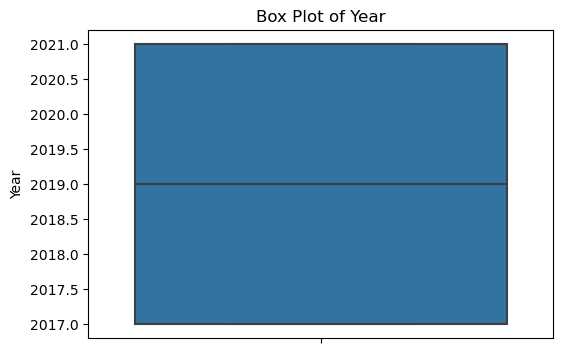

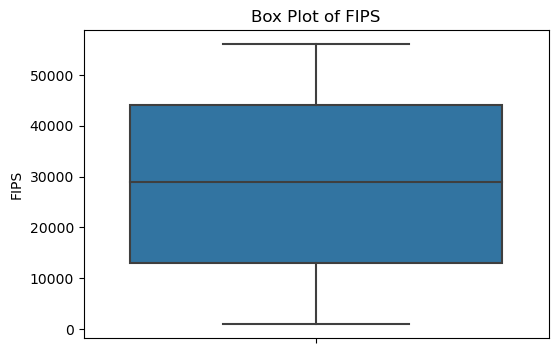

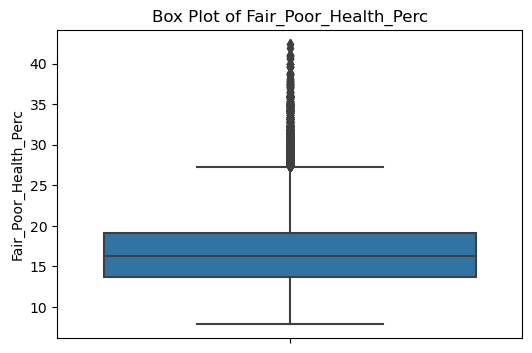

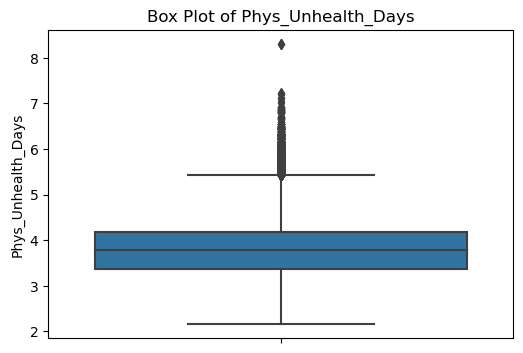

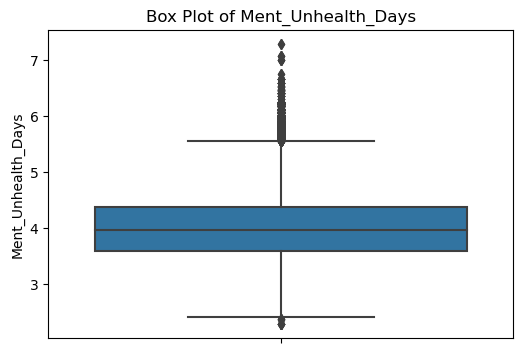

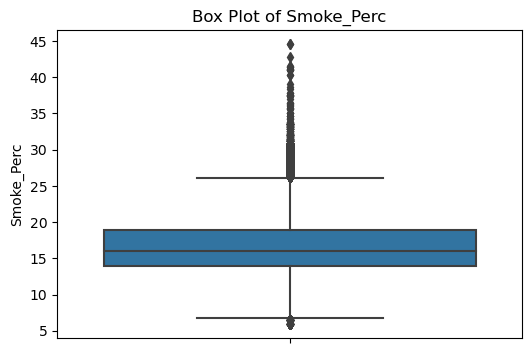

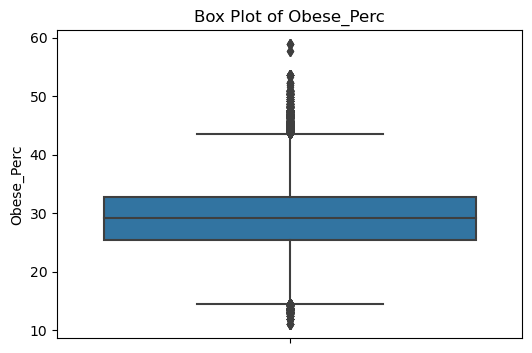

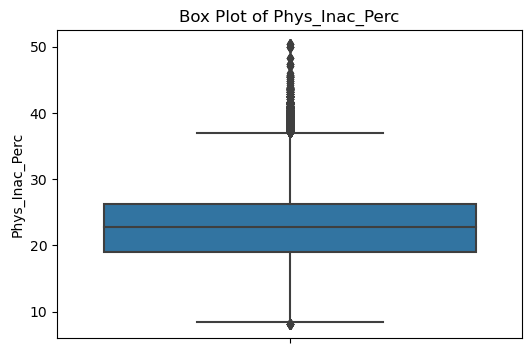

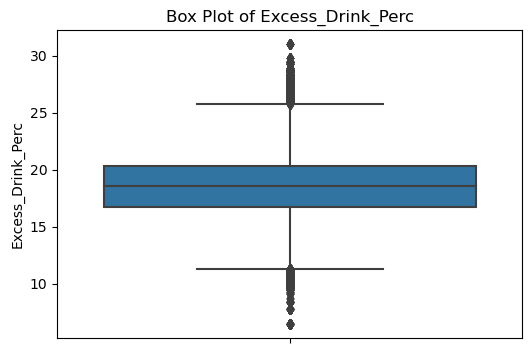

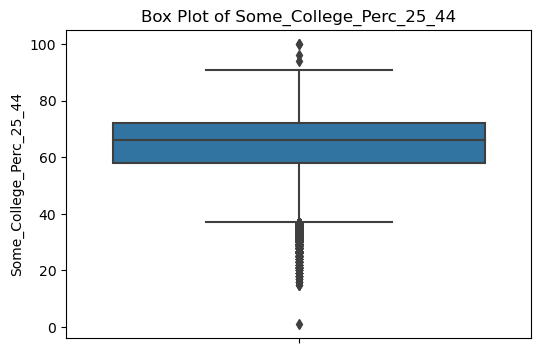

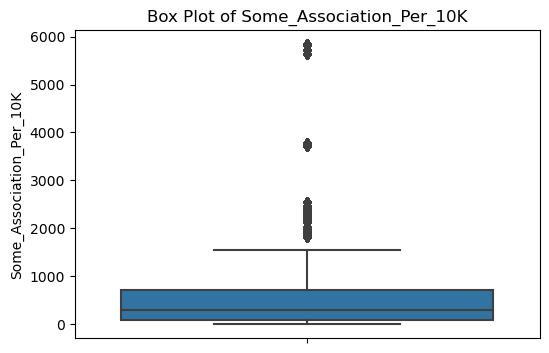

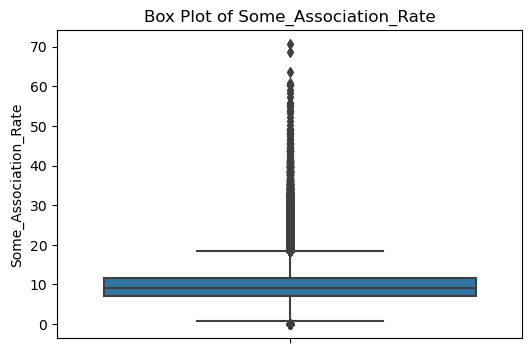

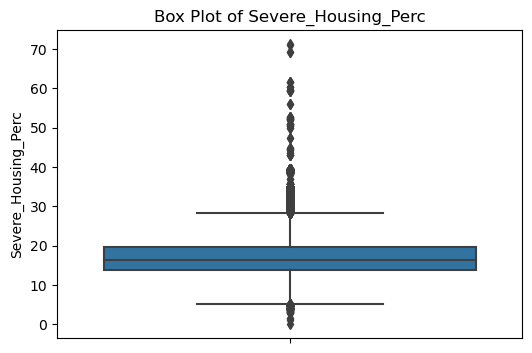

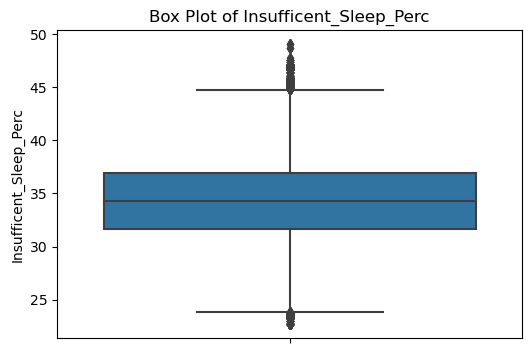

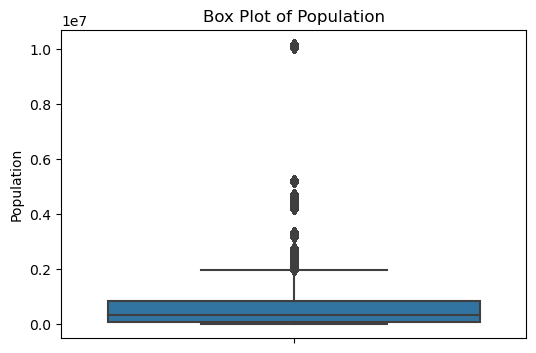

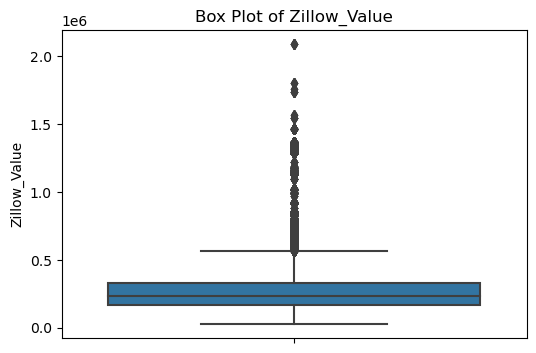

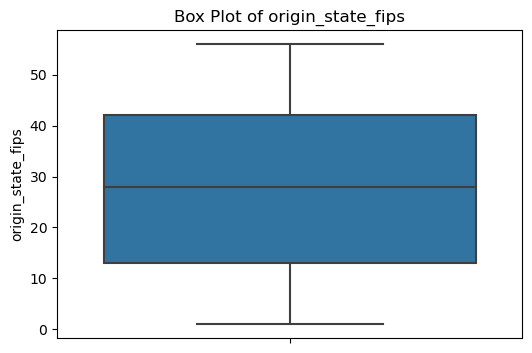

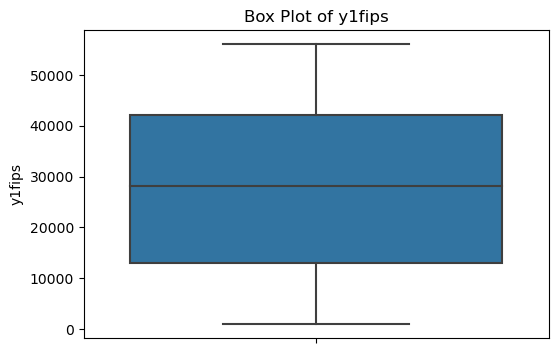

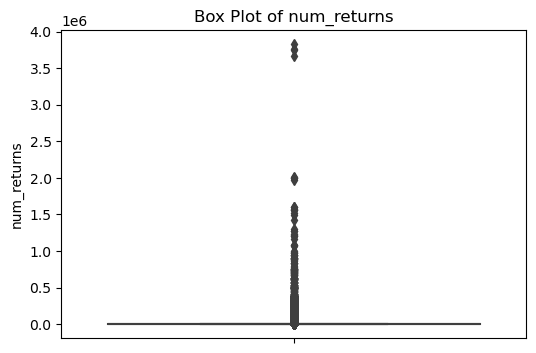

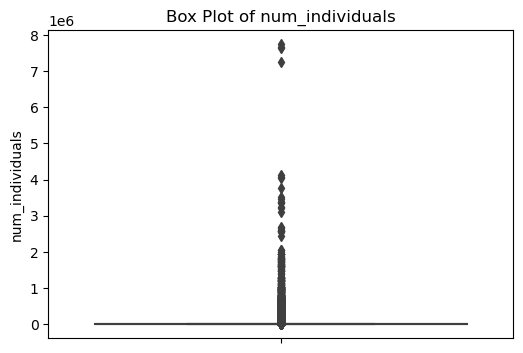

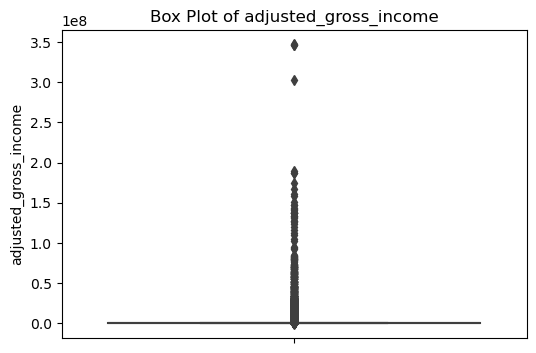

In [20]:
#boxplots

#dropping non-number columns for boxplots and correlation
num_data = data.drop(columns=['State', 'County'])

for column in num_data.columns:
    plt.figure(figsize=(6, 4))
    sb.boxplot(y=num_data[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()

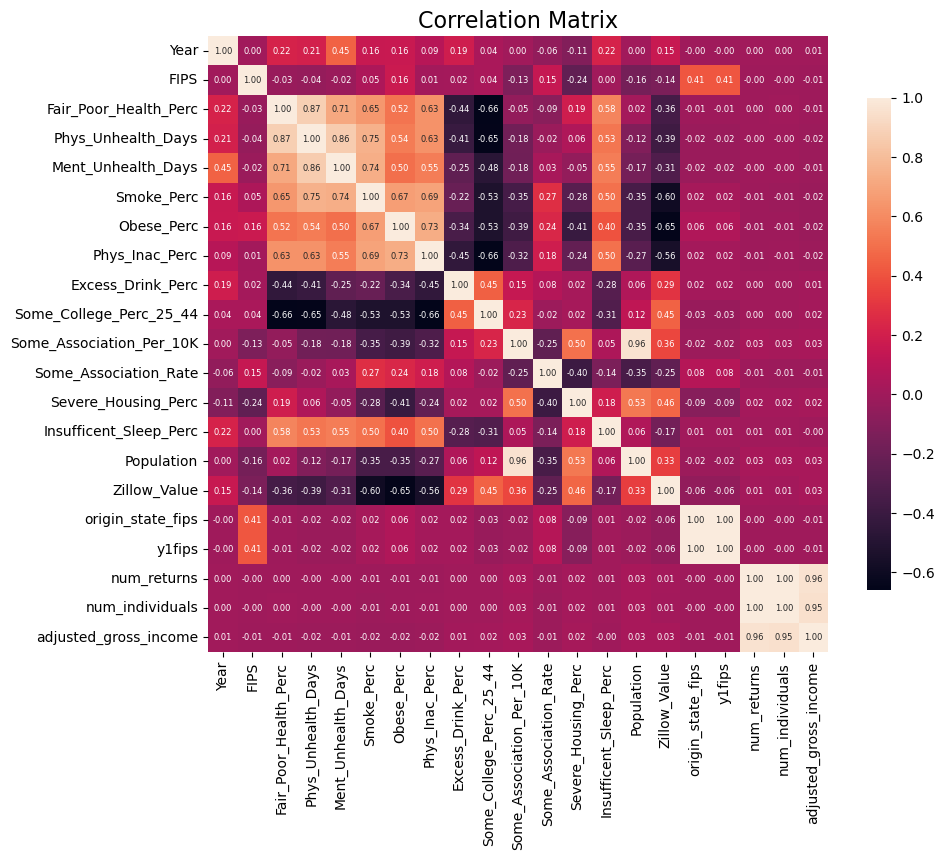

In [22]:
#correlation

#plot correlations
plt.figure(figsize=(10, 8))
sb.heatmap(num_data.corr(), annot=True, fmt=".2f",annot_kws={"size": 6}, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix", fontsize=16)

plt.show()